In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

In [2]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


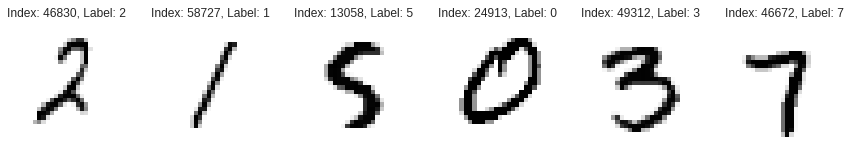

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_idxs):
  img = x_train_full[idx, :]
  label = y_train_full[idx]

  plt.subplot(1, len(random_idxs), i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

In [4]:
print(y_train[0])

4


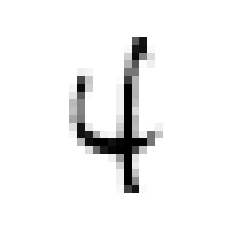

In [5]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

In [7]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [9]:
model = models.Sequential()
model.add(keras.Input(shape=(28, 28), name='input'))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu', name='dense1'))
model.add(layers.Dense(64, activation='relu', name='dense2'))
model.add(layers.Dense(32, activation='relu', name='dense3'))
model.add(layers.Dense(10, activation='softmax', name='output'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


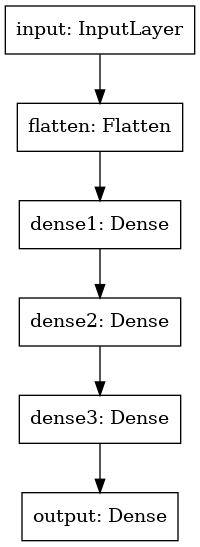

In [10]:
utils.plot_model(model)

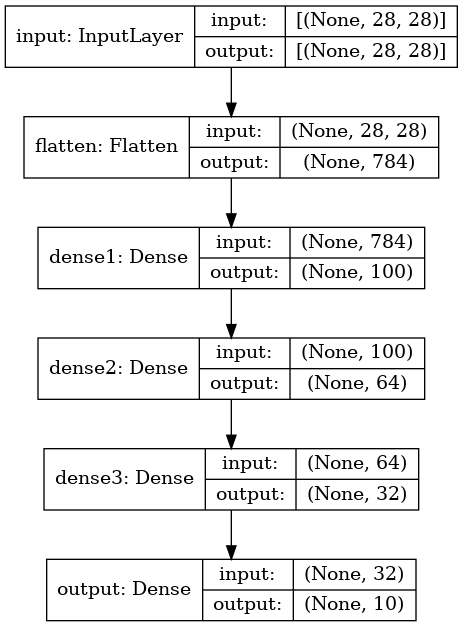

In [11]:
utils.plot_model(model, show_shapes=True)

In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 [==============================] - 8s 6ms/step - loss: 1.7458 - accuracy: 0.4985 - val_loss: 1.0178 - val_accuracy: 0.7581
Epoch 2/50
329/329 [==============================] - 2s 5ms/step - loss: 0.6976 - accuracy: 0.8212 - val_loss: 0.5279 - val_accuracy: 0.8499
Epoch 3/50
329/329 [==============================] - 1s 4ms/step - loss: 0.4576 - accuracy: 0.8729 - val_loss: 0.4307 - val_accuracy: 0.8725
Epoch 4/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3843 - accuracy: 0.8910 - val_loss: 0.3670 - val_accuracy: 0.8929
Epoch 5/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3457 - accuracy: 0.9010 - val_loss: 0.3834 - val_accuracy: 0.8804
Epoch 6/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3199 - accuracy: 0.9075 - val_loss: 0.3232 - val_accuracy: 0.9047
Epoch 7/50
329/329 [==============================] - 1s 4ms/step - loss: 0.3000 - accuracy: 0.9138 - val_loss: 0.2969 - val_accuracy: 0.9116
Epoch 

In [14]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

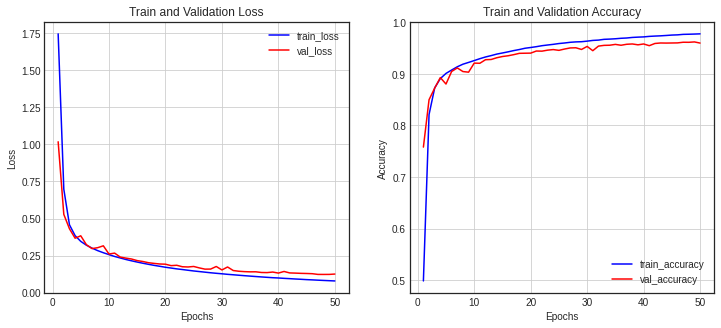

In [15]:
history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [16]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1175 - accuracy: 0.9634


[0.11751443892717361, 0.9634000062942505]

In [17]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

(10000, 10)
[4.9174341e-06 6.0273219e-06 8.1793340e-05 2.0024930e-03 9.1220352e-07
 8.3784644e-06 1.5495971e-08 9.9783295e-01 3.8795755e-05 2.3749526e-05]


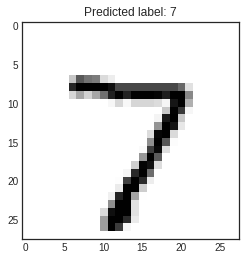

In [18]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [19]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.97      0.96      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.97      0.93      0.95       982
           5       0.97      0.95      0.96       892
           6       0.96      0.97      0.97       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.92      0.96      0.94      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



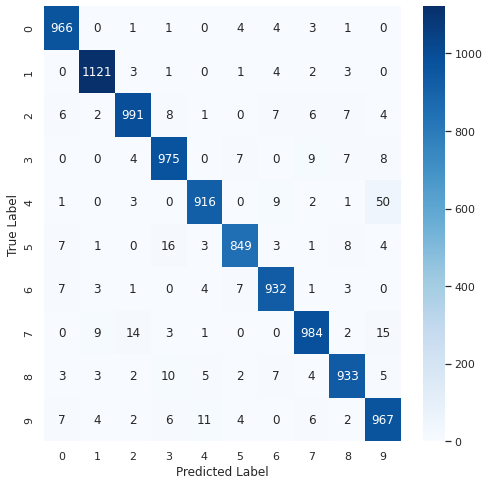

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
model.save('mnist_model.h5')

In [22]:
loaded_model = models.load_model('mnist_model.h5')
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense1 (Dense)               (None, 100)               78500     
_________________________________________________________________
dense2 (Dense)               (None, 64)                6464      
_________________________________________________________________
dense3 (Dense)               (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 87,374
Trainable params: 87,374
Non-trainable params: 0
_________________________________________________________________


In [23]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

(10000, 10)
[4.9174341e-06 6.0273219e-06 8.1793340e-05 2.0024930e-03 9.1220352e-07
 8.3784644e-06 1.5495971e-08 9.9783295e-01 3.8795755e-05 2.3749526e-05]


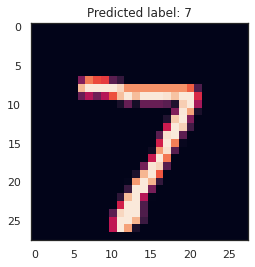

In [24]:
#예측값 시각화하기
arg_pred_y2 = np.argmax(pred_ys2, axis=1)

plt.title(f'Predicted label: {arg_pred_y2[0]}')
plt.imshow(x_test[0])
plt.show()

In [25]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

(10000, 10)
[0.11953129 0.13939157 0.09289489 0.09738066 0.08146673 0.0968748
 0.0675279  0.09417658 0.10588134 0.10487421]


In [26]:
from tensorflow.keras import callbacks

In [27]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0860 - accuracy: 0.9750
Epoch 2/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0801 - accuracy: 0.9762
Epoch 3/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0740 - accuracy: 0.9782
Epoch 4/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0687 - accuracy: 0.9801
Epoch 5/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0634 - accuracy: 0.9820
Epoch 6/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0594 - accuracy: 0.9829
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0557 - accuracy: 0.9838
Epoch 8/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0526 - accuracy: 0.9851
Epoch 9/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9867
Epoch 10/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.045

In [28]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0423 - accuracy: 0.9883 - val_loss: 0.1102 - val_accuracy: 0.9666
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0392 - accuracy: 0.9894 - val_loss: 0.1103 - val_accuracy: 0.9662
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0363 - accuracy: 0.9901 - val_loss: 0.1110 - val_accuracy: 0.9667
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0340 - accuracy: 0.9910 - val_loss: 0.1073 - val_accuracy: 0.9669
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0311 - accuracy: 0.9920 - val_loss: 0.1054 - val_accuracy: 0.9679
Epoch 6/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0296 - accuracy: 0.9924 - val_loss: 0.1029 - val_accuracy: 0.9687
Epoch 7/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0274 - accuracy: 0.9931 - val_loss: 0.1135 - val_accuracy:

In [29]:
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0203 - accuracy: 0.9955 - val_loss: 0.1068 - val_accuracy: 0.9686
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0186 - accuracy: 0.9962 - val_loss: 0.1051 - val_accuracy: 0.9706
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0173 - accuracy: 0.9965 - val_loss: 0.1109 - val_accuracy: 0.9686
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0163 - accuracy: 0.9970 - val_loss: 0.1066 - val_accuracy: 0.9698
Epoch 5/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0149 - accuracy: 0.9975 - val_loss: 0.1079 - val_accuracy: 0.9702


In [30]:
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return learning_rate * tf.math.exp(-0.1)

In [31]:
round(model.optimizer.lr.numpy(), 5)

0.01

In [32]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.lr.numpy(), 5)

0.00607

In [33]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0056 - accuracy: 0.9998 - val_loss: 0.1153 - val_accuracy: 0.9708
Epoch 2/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0054 - accuracy: 0.9997 - val_loss: 0.1155 - val_accuracy: 0.9707
Epoch 3/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0052 - accuracy: 0.9998 - val_loss: 0.1160 - val_accuracy: 0.9711
Epoch 4/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0050 - accuracy: 0.9998 - val_loss: 0.1178 - val_accuracy: 0.9699
Epoch 5/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0049 - accuracy: 0.9999 - val_loss: 0.1189 - val_accuracy: 0.9697
Epoch 6/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0047 - accuracy: 0.9999 - val_loss: 0.1180 - val_accuracy: 0.9707
Epoch 7/30
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0046 - accuracy: 0.9998 - val_loss: 0.1178 - val_accuracy:

In [34]:
%load_ext tensorboard
%tensorboard --logdir {log_dir}

In [35]:
# 기존에 사용했던 mnist의 데이터들을 활용해서 모델에 checkpoint를 만들고 Earlystopping을 설정해주세요.

check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5', save_best_only=True)

early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1267 - val_accuracy: 0.9706
Epoch 2/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9707
Epoch 3/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1269 - val_accuracy: 0.9708
Epoch 4/10
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1272 - val_accuracy: 0.9706
